# Descripción del proyecto

## Contexto

El departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 
    
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Descripción de los datos

## Datos utilizados en la primera parte del proyecto

`/datasets/hypotheses_us.csv`

  - `Hypotheses:` breves descripciones de las hipótesis
  - `Reach:` alcance del usuario, en una escala del uno a diez
  - `Impact:` impacto en los usuarios, en una escala del uno al diez
  - `Confidence:` confianza en la hipótesis, en una escala del uno al diez
  - `Effort:` los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

## Datos utilizados en la segunda parte del proyecto

`/datasets/orders_us.csv`

  - `transactionId:` identificador de pedido
  - `visitorId:` identificador del usuario que realizó el pedido
  - `date:` fecha del pedido
  - `revenue:` ingresos del pedido
  - `group:` el grupo del test A/B al que pertenece el usuario

`/datasets/visits_us.csv`

  - `date:` la fecha
  - `group:` grupo del test A/B
  - `visits:` el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

# **Parte 1.** Priorizar hipótesis

El archivo `hypotheses_us.csv` contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con `Reach`, `Impact`, `Confidence` y `Effort` especificados para cada una.

El ejercicio consiste en:

  - Aplicar el framework `ICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
  - Aplicar el framework `RICE` para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
  - Mostrar cómo cambia la priorización de hipótesis cuando utilizas `RICE` en lugar de `ICE`. Proporcionar una explicación de los cambios.

# **Parte 2.** Análisis de test A/B

Realizaste un test A/B y obtuviste los resultados descritos en los archivos `orders_us.csv` y `visitors_us.csv.`

## Ejercicio

Analiza el test A/B:

  1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
  2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
  3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
  4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
  5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
  6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
  7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
  8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
  9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
  10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
  11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
  12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
  13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
      1. Para la prueba, considera a uno de los grupos como líder. 
      2. Para la prueba, concluye que no hay diferencia entre los grupos. 
      3. Continúa la prueba.

El proyecto será evaluado según estos criterios:

  - Cómo preparas los datos para el análisis
  - Cómo priorizas las hipótesis
  - Cómo interpretas los gráficos resultantes
  - Cómo calculas la significancia estadística
  - Qué conclusiones sacas con base en los resultados del test A/B
  - Si sigues la estructura del proyecto y mantienes el código ordenado
  - Las conclusiones que sacas
  - Si dejas comentarios en cada paso

# Proyecto 9

## *Preparar los datos para el analisis*

In [25]:
# Importar librerias
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Leer el archivos
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('datasets/orders_us.csv')
visits = pd.read_csv('datasets/visits_us.csv')

In [4]:
# Analizar los DataFrames
print('DataFrame hypotheses:')
print(hypotheses.info())
print('-'*50)
print('DataFrame orders:')
print(orders.info())
print('-'*50)
print('DataFrame visits:')
print(visits.info())

DataFrame hypotheses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
--------------------------------------------------
DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4

In [5]:
# Analizar si existe algun valor nulo
print('DataFrame hypotheses:')
print(hypotheses.isnull().sum())
print('-'*50)
print('DataFrame orders:')
print(orders.isnull().sum())
print('-'*50)
print('DataFrame visits:')
print(visits.isnull().sum())

DataFrame hypotheses:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64
--------------------------------------------------
DataFrame orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
--------------------------------------------------
DataFrame visits:
date      0
group     0
visits    0
dtype: int64


In [6]:
# Analizar si existe algun valor duplicado
print('Valores duplicados en hypotheses:', hypotheses.duplicated().sum())
print('-'*50)
print('Valores duplicados en orders:', orders.duplicated().sum())
print('-'*50)
print('Valores duplicados en visits:', visits.duplicated().sum())

Valores duplicados en hypotheses: 0
--------------------------------------------------
Valores duplicados en orders: 0
--------------------------------------------------
Valores duplicados en visits: 0


In [7]:
# Analizar los valores unicos
print('DataFrame hypotheses:')
print(hypotheses.nunique())
print('-'*50)
print('DataFrame orders:')
print(orders.nunique())
print('-'*50)
print('DataFrame visits:')
print(visits.nunique())

DataFrame hypotheses:
Hypothesis    9
Reach         6
Impact        7
Confidence    7
Effort        6
dtype: int64
--------------------------------------------------
DataFrame orders:
transactionId    1197
visitorId        1031
date               31
revenue           403
group               2
dtype: int64
--------------------------------------------------
DataFrame visits:
date      31
group      2
visits    58
dtype: int64


In [8]:
# Mostrar los datos
print('DataFrame hypotheses:')
display(hypotheses)
print('DataFrame orders:')
display(orders.head())
print('DataFrame visits:')
display(visits.head())

DataFrame hypotheses:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


DataFrame orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


DataFrame visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Observaciones

  - El DataFrame `hypotheses` y `orders` contienen en su columnas algunas mayusculas por lo que haremos el cambio a minusculas.
  - En el Dataframe `orders` observamos que los valores unicos de la columna `visitorId` solo hay *1031* valores unicos debiendo ser *1197*, esto nos indica que existen valores duplicados implicitos los cuales pueden afectar nuestro analisis de hipotesis mas adelante.
  - Cambiar los tipos de datos de algunas columnas en los DataFrames `orders` y `visits`

## Modificar Columnas de los DataFrames

In [9]:
# Renombrar columnas del DataFrame hypotheses
hypotheses.columns = hypotheses.columns.str.lower()
# Renombrar columnas del DataFrame orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
# Convertir la columna date de orders a tipo datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Convertir la columna date de visits a tipo datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# Verificar los cambios
print('DataFrame hypotheses:')
print(hypotheses.info())
print('-'*50)
print('DataFrame orders:')
print(orders.info())
print('-'*50)
print('DataFrame visits:')
print(visits.info())

DataFrame hypotheses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
--------------------------------------------------
DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        

## Buscar valores duplicados implicitos

In [11]:
orders_duplicates = orders.groupby('visitor_id').nunique()
orders_duplicates = orders_duplicates[orders_duplicates['group'] > 1]
orders_duplicates = orders_duplicates.reset_index()

display(orders_duplicates.head())
orders_duplicates.info()

,visitor_id,transaction_id,date,revenue,group
0,8300375,2,2,2,2
1,199603092,5,5,4,2
2,232979603,2,1,2,2
3,237748145,5,4,3,2
4,276558944,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   visitor_id      58 non-null     int64
 1   transaction_id  58 non-null     int64
 2   date            58 non-null     int64
 3   revenue         58 non-null     int64
 4   group           58 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


### Observaciones

Ya encontramos los usuarios que realizaron la prueba A y la prueba B pero no podemos descartarlos aun por que podemos afectar el tamaño de la prueba por lo que haremos 3 Dataframes por ahora, el primero es el de `orders` el cual contendra todos los usuarios en ambas pruebas, `orders_duplicates` el cual seran solo los usuarios que hicieron ambas pruebas y el ultimo DataFrame sera donde solo se encuentren los usaurios que realizaron una sola prueba. Asi mas adelante podemos ver el impacto de su inclusion y exclusion en los resultados.

ffffffffffffffffffffffffffffff

# **Parte 1.** Priorizar hipótesis

## Aplicar el framework `ICE`

Para aplicar el framework `ICE` se puede aplicar las siguientes operaciones:

$$
\begin{align}
ICE &= Impact\times Confidence\times Ease\\
\\
ICE &= \frac{Impact\times Confidence}{Effort}
\end{align}
$$

Dado que no tenemos Ease (Facilidad) en nuestro DataFrame utilizaremos la segunda ecuacion

In [12]:
# Aplicar framework ICE
hypotheses_ice = hypotheses.copy()
hypotheses_ice['ICE'] = (hypotheses_ice['impact'] * hypotheses_ice['confidence']) / hypotheses_ice['effort']

# Ordenar ICE en orden descendente
hypotheses_ice = hypotheses_ice.sort_values(by='ICE', ascending=False)


# Mostrar los datos
pd.set_option('display.max_colwidth', None)
hypotheses_ice

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


## Aplicar el framework `RICE`

Para aplicar el framework `RICE` se raliza la siguiente operacion:

$$
\begin{align}
RICE &= \frac{Reach\times Impact\times Confidence}{Effort}
\end{align}
$$

In [13]:
# Aplicar framework RICE
hypotheses_rice = hypotheses.copy()
hypotheses_rice['RICE'] = (hypotheses_rice['reach'] * hypotheses_rice['impact'] * hypotheses_rice['confidence']) / hypotheses_rice['effort']

# Ordenar RICE en orden descendente
hypotheses_rice = hypotheses_rice.sort_values(by='RICE', ascending=False)

# Mostrar los datos
hypotheses_rice

,hypothesis,reach,impact,confidence,effort,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,3.0


## Mostrar cómo cambia la priorización de hipótesis cuando utilizas `RICE` en lugar de `ICE`

In [14]:
# Unir los DataFrames
hypotheses_ice_rice = hypotheses_ice.merge(hypotheses_rice, on='hypothesis')
hypotheses_ice_rice = hypotheses_ice_rice[['hypothesis', 'ICE', 'RICE']]
hypotheses_ice_rice.round(1)

,hypothesis,ICE,RICE
0,Launch a promotion that gives users discounts on their birthdays,16.2,16.2
1,Add two new channels for attracting traffic. This will bring 30% more users,13.3,40.0
2,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2,112.0
3,Show banners with current offers and sales on the main page. This will boost conversion,8.0,40.0
4,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.0,56.0
5,Launch your own delivery service. This will shorten delivery time,2.0,4.0
6,Add a customer review page. This will increase the number of orders,1.3,4.0
7,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.1,9.0
8,Change the background color on the main page. This will increase user engagement,1.0,3.0


De acuerdo a las sigueintes tablas podemos decir lo siguiente:

 - Promoción de descuentos en cumpleaños:  
    - __ICE:__ 16.2  
    - __RICE:__ 16.2  
   Ambos marcos coinciden en este caso. La confianza es de 9; bastante alta y el esfuerzo es de 5, no es alto para implementarlo, podría ser una buena opción.  
   
 - Agregar dos nuevos canales para atraer tráfico:  
    - __ICE:__ 13.33  
    - __RICE:__ 40.0  
   Aquí vemos una diferencia significativa. RICE valora más esta idea debido a su alto alcance (traer un 30% más de usuarios).  
   
 - Agregar un formulario de suscripción en todas las páginas principales:  
    - __ICE:__ 11.2  
    - __RICE:__ 112.0  
   Nuevamente, RICE otorga más puntos debido al alto alcance (compilar una lista de correo).  

 - Mostrar banners con ofertas y descuentos en la página principal:  
    - __ICE:__ 8.0  
    - __RICE:__ 40.0  
   RICE valora más esta idea debido a su impacto potencial en la conversión.  

 - Agregar bloques de recomendación de productos en el sitio de la tienda:  
    - __ICE:__ 7.0  
    - __RICE:__ 56.0  
   RICE nuevamente otorga más puntos debido al alto impacto en la conversión y el tamaño promedio de compra.  

 - Lanzar tu propio servicio de entrega:  
    - __ICE:__ 2.0  
    - __RICE:__ 4.0  
   Ambos marcos sugieren que esta idea tiene un impacto limitado.  

 - Agregar una página de reseñas de clientes:  
    - __ICE:__ 1.33  
    - __RICE:__ 4.0  
   RICE valora más esta idea debido a su impacto en el número de pedidos.  

 - Cambiar la estructura de categorías:  
    - __ICE:__ 1.125  
    - __RICE:__ 9.0  
   RICE nuevamente otorga más puntos debido a su impacto en la conversión.  

En general, RICE tiende a valorar más las ideas con un alto alcance, mientras que ICE se enfoca en el impacto, la confianza y la facilidad de implementación. La elección entre ambos depende de tus objetivos y contexto específico. ¿Estás buscando ideas rápidas y fáciles de implementar o estás planificando a largo plazo?

### Nuestras 3 mejores opciones en el framwork `ICE` son: 
 - Promoción de descuentos en cumpleaños: _Alcance:_ 1, _Impacto:_ 9, _Confianza:_ 9, _Esfuerzo:_ 5
 - Agregar dos nuevos canales para atraer tráfico: _Alcance:_ 3, _Impacto:_ 10, _Confianza:_ 8, _Esfuerzo:_ 6
 - Agregar un formulario de suscripción en todas las páginas principales: _Alcance:_ 10, _Impacto:_ 8, _Confianza:_ 7, _Esfuerzo:_ 5

### Nuestras 3 mejores opciones en el framwork `RICE` son: 
 - Agregar un formulario de suscripción en todas las páginas principales: _Alcance:_ 10, _Impacto:_ 8, _Confianza:_ 7, _Esfuerzo:_ 5
 - Agregar bloques de recomendación de productos en el sitio de la tienda: _Alcance:_ 8, _Impacto:_ 3, _Confianza:_ 7, _Esfuerzo:_ 3
 - Agregar dos nuevos canales para atraer tráfico: _Alcance:_ 3, _Impacto:_ 10, _Confianza:_ 8, _Esfuerzo:_ 6

#### Seleccion de hipotesis

Como podemos observar algunas hipotesis en ambos frameworks se repiten pero haremos un analisis mas profundo:

 1. La hipotesis con el `ICE` mas alto es la _Promocion de descuentos en cumpleaños_ la cual tiene un alcance muy bajo, el impacto y la confianza es alto y no requiere mucho esfuerzo, aun asi debido al alcance no la tomaria en cuenta.
 2. Agregar dos nuevos canales para atrear trafico es la segunda opcion con el `ICE` mas alto y la tercera en `RICE` teniendo un alcance bajo, un impacto y confianza altos y un esfuerzo medio por lo que seri una buena opcion.
 3. Agragar un forulario de suscripcion en todas las paginas principales es la 3 opcion en el framework `ICE` y la que tiene el `RICE` mas alto teniendo el mayor alcance, el impacto y la confianza no estan nada al y requiere un esfuerzo medio, por lo que por ahora es nuestra mejor opcion.
 4. Agregar bloques de recomendacion de productos en el sitio es la segunda opcion de acuerod al `RICE` con un alcance alto, un impacto muy bajo una confianza alta y un esfuerzo medio, debido al impacto yo la descartatia como una de nuestras opciones. 
 
De acuerdo a este analisis yo tomaria como hipotesis la siguientes en este orden: 
 1. Agregar dos nuevos canales para atraer trafico. Esto atraera un 30% mas de usuarios.
 2. Agregar un formulario de suscripcion en todas las paginas principales. Esto ayudara a compilar un a lista de correos.
 
A pesar de que agregar un formulario de suscripcion tiene un mayor alcance y menor esfuerzo, me decanto por Agregar dos nuevos canales ya que tiene un mayor Impacto en los usuarios y un mayor confianza, aunque algo elevado el esfuerzo en comparacion de su contraparte, ya que esto nos ayudara a atraer un 30% mas de usuarios.

En este caso si se tiene el esfuerzo suficiente se pueden realizar ambas pruebas de lo contrario nuestra mejor opcion es Agregar dos nuevos canales de trafico.

# **Parte 2.** Análisis de test A/B

## Representa gráficamente el ingreso acumulado por grupo.

In [16]:
daily_orders = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
daily_orders

,date,group,revenue
0,2019-08-01,A,2356.8
1,2019-08-01,B,1620.0
2,2019-08-02,A,1503.5
3,2019-08-02,B,2623.8
4,2019-08-03,A,1815.2
...,...,...,...
57,2019-08-29,B,3623.7
58,2019-08-30,A,1364.3
59,2019-08-30,B,3393.3
60,2019-08-31,A,991.4


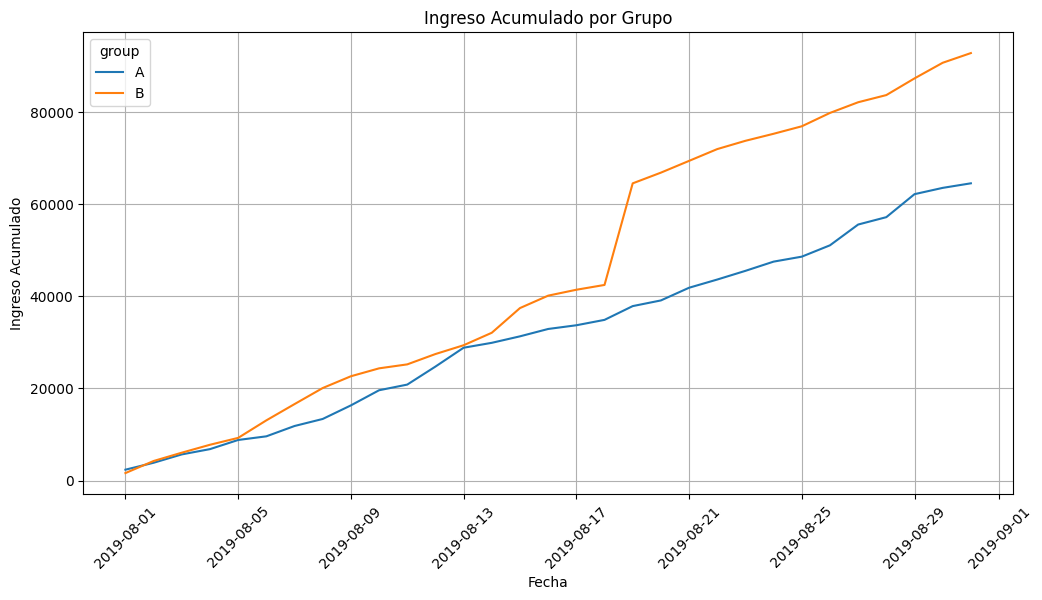

In [31]:
daily_orders.pivot_table(
    index='date',
    columns='group',
    values='cumulative_revenue',
    aggfunc='mean'
).reset_index().melt(id_vars='date', value_name='cumulative_revenue', var_name='group')

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_orders, x='date', y='cumulative_revenue', hue='group')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.xticks(rotation=45)
plt.grid()
plt.show()

 - Grupo A: Comienza más bajo pero eventualmente supera al Grupo B. Indica que tuvo un inicio más lento pero generó un mayor ingreso acumulado al final del período observado.
 - Grupo B: Muestra un aumento constante pero no alcanza el mismo nivel de ingreso final que el Grupo A.

### Conclusión:

Ambos grupos aumentaron su ingreso acumulado con el tiempo.
Grupo A fue más exitoso en generar un mayor ingreso al final del período.
Las estrategias o condiciones aplicadas al Grupo A podrían haber sido más efectivas en términos de generación de ingresos.